In [1]:
import re
from TextCleaner import TextCleaner
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import nltk
from langdetect import detect
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.stem.snowball import PorterStemmer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, SimpleRNN, SpatialDropout1D
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding

# Classifiers
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.naive_bayes import (
    BernoulliNB,
    ComplementNB,
    MultinomialNB,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
pd.options.mode.chained_assignment = None  # default='warn'

In [54]:
df = pd.read_csv('sentiment.csv')
df = df.drop(df.columns[0], axis=1)
df

Author                                               Text  \
0     TedDitchburnNNP  @james198428 @bellacaledonia Salmond works in ...   
1         calvin_1287  Not tryna get in rouble but they look like Swa...   
2      GeorgeKushtwit  Rouble farming Andy --- New Emotes https://t.c...   
3            pietka_t  @WilliamtheArti1 @nypost Can you calculate !? ...   
4              Onmeed  The usual suspects who can’t get a gig in UK m...   
...               ...                                                ...   
3531        weebo_kun  @SHOWNUBEANER “A British pound sign” why must ...   
3532  threadreaderapp  @bogustrumper Salam, you can read it here: In ...   
3533     trader_blitz  GBP/JPY | $GBPJPY | $GBP $JPY\n\nBRITISH POUND...   
3534          Imoteda  @vincentdesmond_ Happy New Year my love!!! I h...   
3535   dean_allenavfc  @NicolaSturgeon No British pound, and have to ...   

                           Time  Like Count Currency ISO Code  \
0     2021-01-31 22:43:18+00:00           0               RUB   
1     2021-01-31 19:01:16+00:00           2               RUB   
2     2021-01-31 17:49:32+00:00           0               RUB   
3     2021-01-31 14:57:14+00:00           0               RUB   
4     2021-01-31 13:37:15+00:00           1               RUB   
...                         ...         ...               ...   
3531  2021-01-01 05:58:23+00:00           0               GBP   
3532  2021-01-01 04:38:50+00:00           0               GBP   
3533  2021-01-01 00:42:01+00:00           0               GBP   
3534  2021-01-01 00:40:48+00:00           1               GBP   
3535  2021-01-01 00:14:10+00:00           0               GBP   

                                                    Url  target  
0     https://twitter.com/TedDitchburnNNP/status/135...     0.0  
1     https://twitter.com/calvin_1287/status/1355954...     0.0  
2     https://twitter.com/GeorgeKushtwit/status/1355...     0.0  
3     https://twitter.com/pietka_t/status/1355892907...     0.0  
4     https://twitter.com/Onmeed/status/135587277638...     0.0  
...                                                 ...     ...  
3531  https://twitter.com/weebo_kun/status/134488566...     0.0  
3532  https://twitter.com/threadreaderapp/status/134...     0.0  
3533  https://twitter.com/trader_blitz/status/134480...     0.0  
3534  https://twitter.com/Imoteda/status/13448057421...     0.0  
3535  https://twitter.com/dean_allenavfc/status/1344...     0.0  

[3536 rows x 7 columns]

In [82]:
df

Author                                               Text  \
0     TedDitchburnNNP  @james198428 @bellacaledonia Salmond works in ...   
1         calvin_1287                                     AAAA   AAAA      
2      GeorgeKushtwit  Rouble farming Andy --- New Emotes https://t.c...   
3            pietka_t  @WilliamtheArti1 @nypost Can you calculate !? ...   
4              Onmeed  The usual suspects who can’t get a gig in UK m...   
...               ...                                                ...   
3531        weebo_kun  @SHOWNUBEANER “A British pound sign” why must ...   
3532  threadreaderapp  @bogustrumper Salam, you can read it here: In ...   
3533     trader_blitz  GBP/JPY | $GBPJPY | $GBP $JPY\n\nBRITISH POUND...   
3534          Imoteda  @vincentdesmond_ Happy New Year my love!!! I h...   
3535   dean_allenavfc  @NicolaSturgeon No British pound, and have to ...   

                           Time  Like Count Currency ISO Code  \
0     2021-01-31 22:43:18+00:00           0               RUB   
1     2021-01-31 19:01:16+00:00           2               RUB   
2     2021-01-31 17:49:32+00:00           0               RUB   
3     2021-01-31 14:57:14+00:00           0               RUB   
4     2021-01-31 13:37:15+00:00           1               RUB   
...                         ...         ...               ...   
3531  2021-01-01 05:58:23+00:00           0               GBP   
3532  2021-01-01 04:38:50+00:00           0               GBP   
3533  2021-01-01 00:42:01+00:00           0               GBP   
3534  2021-01-01 00:40:48+00:00           1               GBP   
3535  2021-01-01 00:14:10+00:00           0               GBP   

                                                    Url  target  
0     https://twitter.com/TedDitchburnNNP/status/135...     0.0  
1     https://twitter.com/calvin_1287/status/1355954...     0.0  
2     https://twitter.com/GeorgeKushtwit/status/1355...     0.0  
3     https://twitter.com/pietka_t/status/1355892907...     0.0  
4     https://twitter.com/Onmeed/status/135587277638...     0.0  
...                                                 ...     ...  
3531  https://twitter.com/weebo_kun/status/134488566...     0.0  
3532  https://twitter.com/threadreaderapp/status/134...     0.0  
3533  https://twitter.com/trader_blitz/status/134480...     0.0  
3534  https://twitter.com/Imoteda/status/13448057421...     0.0  
3535  https://twitter.com/dean_allenavfc/status/1344...     0.0  

[3536 rows x 7 columns]

In [81]:
for (rowNo, rowData) in df.iterrows():
    try:
        if rowNo == 1:
            df.loc[rowNo, 'Text'] =  (df.loc[rowNo, 'Text'] + ' ') * df.loc[rowNo, 'Like Count']
    except Exception as e:                                                                          
        print("An error occurred : ", e)   

In [76]:
for (rowNo, rowData) in df.iterrows():
    try:
        count = df.loc[rowNo, 'Like Count']
        print(count)
        print(df.loc[rowNo, 'Text'])
        '''if count > 0:
            val = df.loc[rowNo, 'Text']
            for k in count:
                val += ' '
            #df.loc[rowNo, 'Text'] = val'''
    except Exception as e:                                                                          
        print("An error occurred : ", e)   

0
@james198428 @bellacaledonia Salmond works in Putin's propaganda department for the Billionaire's Rouble, and he said once upon time, one could admire some aspects of Putin's foreign policy....and Campbell is best mates with Salmond..and Murray
2
AA
0
Rouble farming Andy --- New Emotes https://t.co/HifyK6Olyj
0
@WilliamtheArti1 @nypost Can you calculate !? Russia has no debt anymore , Russia and China are  trading every dollar for gold , the trade between Russia and China is in rouble and huan just saw this on Twitter https://t.co/yTSgb6NwVR
going short on silver have a nice week end ,ze Ruzzians they are ready
1
The usual suspects who can’t get a gig in UK media and now work for Russia Today are eerily silent about the Russia wide protests for Navalny!

Jon Gaunt in particular has taken the rouble for his silence over the pro Navalny movement gathering momentum!
1
ALL THE SPOILERS LMAOOO THEY'RE INT ROUBLE
1
"#UcheMaduagwu, a celebrated fixture of #Nollywood &amp; famous #socialmedi

0
@alfonslopeztena yeah sure looks like 1b$ ... its not even 1b turkish lira and you are a damn liar
1
@bisexualriz ARHJjjhgh also also i just orderer a new like.. orange/red/pink nice autumn dice as well as an INSANE deal that's just like, a turkish lira for THIRTY d6
0
This is BIST all shares ( Turkish index) Vs Gold chart (purple).

Infact it has done a lot better than gold since 2013 when Turkish lira started depreciating a lot &amp; gold peaked &amp; less volatile Vs gold too.... https://t.co/fHVv7Egk1P
1
Businesses r the best hedge against inflation (printing of money) historically. 
Just look at Turkey for example recently - 

Turkish Lira is depreciated 700% over USD since 2013 - https://t.co/clp4BUVWBO
0
@m_arslanturk @ersinrtatar I suppose that the Turkish economy is going very well and Turkish lira is very strong. That why the people in Polis has do wait in line for a piece of bread. At least be more wise like Ekrem Immamoglou and fight for your people not the Ottoman dreams

3. Having lived 30y in US &amp; 20y in AU, Currency fluctuate &amp; not relative so exchange rate doesn’t make any difference. https://t.co/MLTeHw7pto
0
At the bottom of the News Feed on Yandex new tab page it lists Dollar, Euro &amp; Petrol (НЕФТЬ) from I'm assuming is the Moscow exchange. Although I think it is interesting that those 3 are quoted. https://t.co/u0GO4iNkwS
0
@Nedsfeed @SenSanders Australian Dollar
American Dollar
European Euro
British pound

Look up xe exchange rates for current rates https://t.co/o3mAJxtyQx
0
#EURUSD $EUR #china #eu #Europe #FOMC

euro dollar exchange rate approaching 1.2200 1.2220 https://t.co/ZtVDJbJxYU
1
#EURUSD $EUR 
1.22 exchange rate euro dollar approach .
0
$ADA January newsflow - unsung heros: 1/ https://t.co/8gEDd8e3z3
Kraken, the largest cryptocurrency exchange by euro trading volume, has added AUD and GBP support for Cardano (ADA)
0
@EyeOfTheKing1 LONDON &amp; SYDNEY--(BUSINESS WIRE)-- Kraken, the largest cryptocurrency exchange by euro tra

2
@TejasKumar_ Exchange is a place where you can buy crypto for euro. @coinbase very easy and secure to start.

Wallet in crypto is equivalent of IBAN in traditional banking. You need that "address" to keep your crypto on your own. (you can keep it on the exchange w/o wallet too). Check @BRDHQ
0
@_debbii3e Need a trustworthy exchange?
@CoinMetro!
Fully licensed in the EU, so they´re a save place to buy BTC.
Deposit and Withdrawal in Euro, British Pounds, Canadian or US Dollar possible, the lowest fees I know.
And they have a great 24/7 support chat!
https://t.co/kpX1a1ntEl
0
@mike59703827385 @zerohedge Like I said above foreign assets. A lot of debt here is owned by other countries. They may not want the USD which would hurt demand. You can exchange currency on forex. What if people wanted the euro instead of the dollar. That’s what I’m saying. Or the sterling or Swiss franc
110
It has been brought to my attention that by midday London had surrendered about 96% of the Euro- denominated

0
British Pound Forecast: Bullish Breakouts on Pace, or At Least on Precipice - Levels for GBP/JPY, GBP/USD Rates https://t.co/UPqmlzCxvC
0
HEADLINE: British Pound (GBP) Latest: Trending Higher Despite UK Unemployment Rise : https://t.co/nRoVd2fpaj #Scrummyninja #vegaslocals #bashninjas #vegas #vegasnews #lasvegas #summerlin #hendersonlv #lasvegasstrip #vegasstrong #unlv #vegaslocalnews
3
@tfoale @IainColledge @harvman1995 @RichardBentall @GunnarHrafnJ @NewforestStock @AndrewKnight226 @devonlass @VikkiTh16913224 @PhilipHunn1 @01ivi3r1u6 @RettopNoj @joelymack @JamieKay22 @KuroiTenshi_Art @KimSussex3 @MadeleinaKay @CatioMiles @fascinatorfun @ItRecks @EUnotCoup @ThatTimWalker @acgrayling @nigel @tit_twatter @AndrewTait67 I agree but the fact remains that Scotland still owns the British pound as much as any othe part of the uk
But they should use the euro
5
@AaronBastani The currency is not a big issue. It would work like ERM in reverse: Scot Pound pegs to certain % range of British Pound;

1
@WarnerDollar joins me today to talk about the #BritishPound and #Euro as a result of the Brexit deal. Have #Forex questions? Send them in live at 2pm PST today!
https://t.co/uXWF5juLll
0
EIGHTY MILLION OF HER MAJESTY'S GREAT BRITISH POUND STERLING
0
Q102: Old money from Europe, including British pound (5)
0
@bbcquestiontime Next question- in which year will the government have destroyed the value of the British Pound by printing (counterfeiting) the currency into oblivion, destroying the wealth of holders? It is a global devaluation race to the bottom where all central banks are playing. #bitcoin
2
@SantiagoAuFund Bitfinex supports US Dollar (USD), Euro (EUR), Great British Pound (GBP), Japanese Yen (JPY) and Chinese Yuan (CNH).
1
@Lisamarie_0317 In primary 1/first grade my class gave us a bank/savings book into which we paid one british pound per week. We were taught that by paying money in the numbers would go up.😊
3
What really happened in that hearing? I thought we were sluts fo

In [188]:
def detect_lang(df):
    return detect(df['Text']) 

In [15]:
#df['Sentiment'] = df.apply(sentiments, axis=1)
#df['Language'] = df.apply(detect_lang, axis=1)

In [53]:
#df = df[df['Language'] == 'en']
df = df.rename(columns={'target': 'category'})
df

Text category
0     @james198428 @bellacaledonia Salmond works in ...  Neutral
1     Not tryna get in rouble but they look like Swa...  Neutral
2     Rouble farming Andy --- New Emotes https://t.c...  Neutral
3     @WilliamtheArti1 @nypost Can you calculate !? ...  Neutral
4     The usual suspects who can’t get a gig in UK m...  Neutral
...                                                 ...      ...
3531  @SHOWNUBEANER “A British pound sign” why must ...  Neutral
3532  @bogustrumper Salam, you can read it here: In ...  Neutral
3533  GBP/JPY | $GBPJPY | $GBP $JPY\n\nBRITISH POUND...  Neutral
3534  @vincentdesmond_ Happy New Year my love!!! I h...  Neutral
3535  @NicolaSturgeon No British pound, and have to ...  Neutral

[3536 rows x 2 columns]

In [15]:
data_v1 = df[['Text','category']]
data_v1.isnull().sum()

Text        0
category    0
dtype: int64

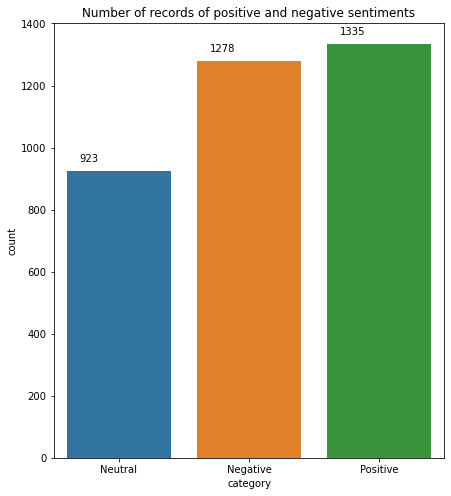

In [16]:
plt.figure(figsize=(7,8))
plt.title("Number of records of positive and negative sentiments")
plot = sn.countplot(x = 'category', data = data_v1)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + 0.1 ,p.get_height()+30))

In [13]:
df['category'] = df['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})
df

Author                                               Text  \
0     TedDitchburnNNP  @james198428 @bellacaledonia Salmond works in ...   
1         calvin_1287  Not tryna get in rouble but they look like Swa...   
2      GeorgeKushtwit  Rouble farming Andy --- New Emotes https://t.c...   
3            pietka_t  @WilliamtheArti1 @nypost Can you calculate !? ...   
4              Onmeed  The usual suspects who can’t get a gig in UK m...   
...               ...                                                ...   
3531        weebo_kun  @SHOWNUBEANER “A British pound sign” why must ...   
3532  threadreaderapp  @bogustrumper Salam, you can read it here: In ...   
3533     trader_blitz  GBP/JPY | $GBPJPY | $GBP $JPY\n\nBRITISH POUND...   
3534          Imoteda  @vincentdesmond_ Happy New Year my love!!! I h...   
3535   dean_allenavfc  @NicolaSturgeon No British pound, and have to ...   

                           Time  Like Count Currency ISO Code  \
0     2021-01-31 22:43:18+00:00           0               RUB   
1     2021-01-31 19:01:16+00:00           2               RUB   
2     2021-01-31 17:49:32+00:00           0               RUB   
3     2021-01-31 14:57:14+00:00           0               RUB   
4     2021-01-31 13:37:15+00:00           1               RUB   
...                         ...         ...               ...   
3531  2021-01-01 05:58:23+00:00           0               GBP   
3532  2021-01-01 04:38:50+00:00           0               GBP   
3533  2021-01-01 00:42:01+00:00           0               GBP   
3534  2021-01-01 00:40:48+00:00           1               GBP   
3535  2021-01-01 00:14:10+00:00           0               GBP   

                                                    Url category  
0     https://twitter.com/TedDitchburnNNP/status/135...  Neutral  
1     https://twitter.com/calvin_1287/status/1355954...  Neutral  
2     https://twitter.com/GeorgeKushtwit/status/1355...  Neutral  
3     https://twitter.com/pietka_t/status/1355892907...  Neutral  
4     https://twitter.com/Onmeed/status/135587277638...  Neutral  
...                                                 ...      ...  
3531  https://twitter.com/weebo_kun/status/134488566...  Neutral  
3532  https://twitter.com/threadreaderapp/status/134...  Neutral  
3533  https://twitter.com/trader_blitz/status/134480...  Neutral  
3534  https://twitter.com/Imoteda/status/13448057421...  Neutral  
3535  https://twitter.com/dean_allenavfc/status/1344...  Neutral  

[3536 rows x 7 columns]

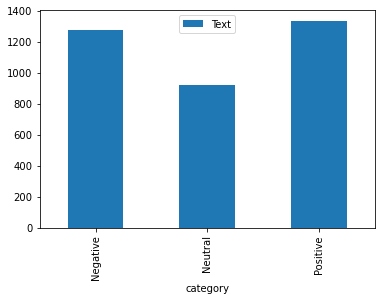

In [17]:
df = df[['Text','category']]
df.groupby('category').count().plot(kind='bar')

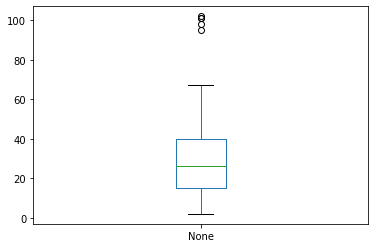

In [18]:
# Calculate tweet lengths
tweet_len = pd.Series([len(tweet.split()) for tweet in df['Text']])

# The distribution of tweet text lengths
tweet_len.plot(kind='box')

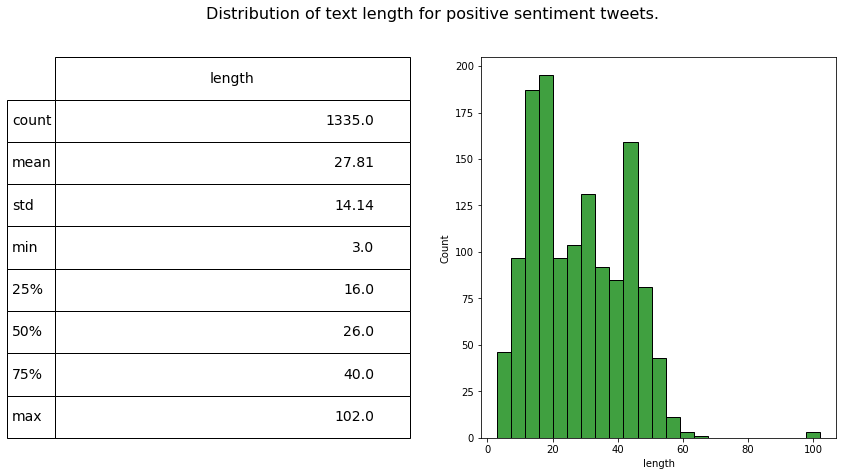

In [20]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.Text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sn.histplot(df[df['category']=='Positive']['length'], ax=ax1,color='green')
describe = df.length[df.category=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

In [23]:
import plotly.express as px
fig = px.pie(df, names='category', title ='Pie chart of different sentiments of tweets')
fig.show()

In [24]:
df.drop(['length'], axis=1, inplace=True)
df.head

<bound method NDFrame.head of                                                    Text category
0     @james198428 @bellacaledonia Salmond works in ...  Neutral
1     Not tryna get in rouble but they look like Swa...  Neutral
2     Rouble farming Andy --- New Emotes https://t.c...  Neutral
3     @WilliamtheArti1 @nypost Can you calculate !? ...  Neutral
4     The usual suspects who can’t get a gig in UK m...  Neutral
...                                                 ...      ...
3531  @SHOWNUBEANER “A British pound sign” why must ...  Neutral
3532  @bogustrumper Salam, you can read it here: In ...  Neutral
3533  GBP/JPY | $GBPJPY | $GBP $JPY\n\nBRITISH POUND...  Neutral
3534  @vincentdesmond_ Happy New Year my love!!! I h...  Neutral
3535  @NicolaSturgeon No British pound, and have to ...  Neutral

[3536 rows x 2 columns]>

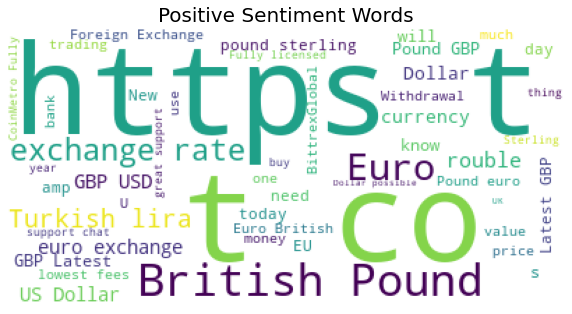

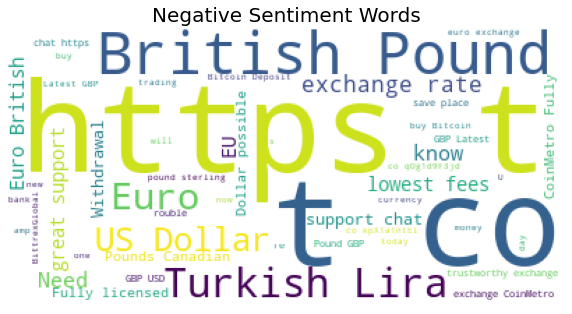

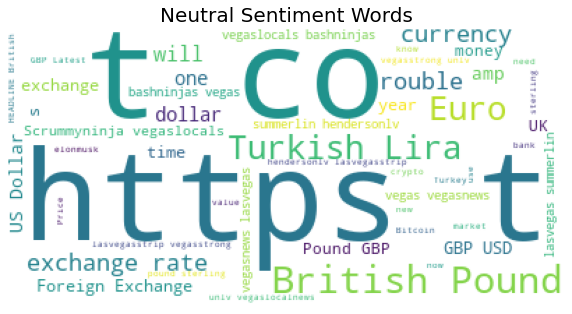

In [26]:
from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(df, category):
    '''
    Generating Word Cloud
    inputs:
       - df: tweets dataset
       - category: Positive/Negative/Neutral
    '''
    # Combine all tweets
    combined_tweets = " ".join([tweet for tweet in df[df.category==category]['Text']])
                          
    # Initialize wordcloud object
    wc = WordCloud(background_color='white', 
                   max_words=50, 
                   stopwords = STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()
    
# Positive tweet words
wordcount_gen(df, 'Positive')
     
# Negative tweet words
wordcount_gen(df, 'Negative')
     
# Neutral tweet words
wordcount_gen(df, 'Neutral')

In [27]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df['Text'][0])
print("\nProcessed tweet ->", tweet_to_words(df['Text'][0]))


Original tweet -> @james198428 @bellacaledonia Salmond works in Putin's propaganda department for the Billionaire's Rouble, and he said once upon time, one could admire some aspects of Putin's foreign policy....and Campbell is best mates with Salmond..and Murray

Processed tweet -> ['james198428', 'bellacaledonia', 'salmond', 'work', 'putin', 'propaganda', 'depart', 'billionair', 'roubl', 'said', 'upon', 'time', 'one', 'could', 'admir', 'aspect', 'putin', 'foreign', 'polici', 'campbel', 'best', 'mate', 'salmond', 'murray']


In [28]:
X = list(map(tweet_to_words, df['Text']))

In [29]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(df['category'])

In [30]:
print(X[0])
print(Y[0])

['james198428', 'bellacaledonia', 'salmond', 'work', 'putin', 'propaganda', 'depart', 'billionair', 'roubl', 'said', 'upon', 'time', 'one', 'could', 'admir', 'aspect', 'putin', 'foreign', 'polici', 'campbel', 'best', 'mate', 'salmond', 'murray']
1


In [31]:
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

In [33]:
print(count_vector.get_feature_names()[0:200])

['0', '00', '000', '000won', '00963952784373', '01', '028', '03', '0375', '039', '0390', '04', '0410', '0438', '0440', '0450', '0454', '0490', '050', '0500', '0510', '0511', '0512', '05am', '06', '07', '08', '08179723026', '082', '088', '09', '099', '09awj3dkdu', '0j3hdzcvt', '0ji3zvogu2', '0jxiwjimf2', '0lthgncici', '0moxfmsgod', '0wsisozfta', '0xxj7ksbwk', '0y0escki1f', '1', '10', '100', '1000', '1000000', '1000k', '100k', '100m', '1092', '10downingstreet', '10k', '11', '110', '116', '11element11', '12', '1216', '12200', '123', '126', '127', '129', '12yr', '13', '13875', '14', '140k', '15', '150', '1500', '150k', '157', '15m', '16', '160', '17', '1700', '1740', '17l8ix6isd', '17th', '18', '1834', '1861', '186m', '1899', '18diannem', '18th', '19', '1900', '1907', '1917', '1920', '1924', '1947', '1949', '195', '1970', '1971', '1980', '1985', '1991', '1992', '1994', '1996', '1998', '19th', '1b', '1em9nkhxj6', '1g3pivzgrr', '1gbfich893', '1h63zxvbdv', '1ibdxopwpa', '1ji5w7nuuk', '1jnvtyj

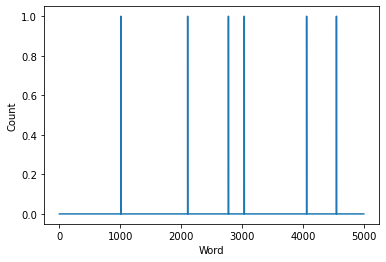

In [34]:
plt.plot(X_train[2,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [36]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['Text'][0])
X, tokenizer = tokenize_pad_sequences(df['Text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 @james198428 @bellacaledonia Salmond works in Putin's propaganda department for the Billionaire's Rouble, and he said once upon time, one could admire some aspects of Putin's foreign policy....and Campbell is best mates with Salmond..and Murray
After Tokenization & Padding 
 [4814 4815 3169 1680    8 3170 4816 4817   15    1 4818   32    6  141
  426  751 2408  137   97  195 3171  166 4819   13 3170   89  443    6
 3172   14  243 4820   34 3169    6 4821    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [37]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [38]:
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (2121, 50) (2121, 3)
Validation Set -> (707, 50) (707, 3)
Test Set -> (708, 50) (708, 3)


In [39]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [41]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

In [44]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [45]:
print(model.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 32)            160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 50, 32)            3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 25, 32)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                16640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 179,939
Trainable params: 179,939
Non-trainable params: 0
________________________________________________

In [46]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.4393
Precision : 0.0000
Recall    : 0.0000
F1 Score  : 0.0000


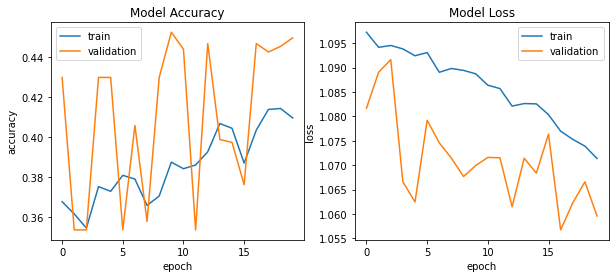

In [47]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

In [52]:
df

Text category
0     @james198428 @bellacaledonia Salmond works in ...  Neutral
1     Not tryna get in rouble but they look like Swa...  Neutral
2     Rouble farming Andy --- New Emotes https://t.c...  Neutral
3     @WilliamtheArti1 @nypost Can you calculate !? ...  Neutral
4     The usual suspects who can’t get a gig in UK m...  Neutral
...                                                 ...      ...
3531  @SHOWNUBEANER “A British pound sign” why must ...  Neutral
3532  @bogustrumper Salam, you can read it here: In ...  Neutral
3533  GBP/JPY | $GBPJPY | $GBP $JPY\n\nBRITISH POUND...  Neutral
3534  @vincentdesmond_ Happy New Year my love!!! I h...  Neutral
3535  @NicolaSturgeon No British pound, and have to ...  Neutral

[3536 rows x 2 columns]

In [9]:
clean = TextCleaner()
text = clean.convert_emoji_to_text("Hilarious 😂. The feeling of making a sale 😎, The feeling of actually fulfilling orders 😒")
print(text)

text4 = "Hello :-) :-)"
resp = clean.convert_emoticons(text4)
print(resp)

Hilarious face with tears of joy. The feeling of making a sale smiling face with sunglasses, The feeling of actually fulfilling orders unamused face
Hello Happy face smiley Happy face smiley


In [10]:
clean = TextCleaner()

def cleaning(df_cl, stop_words):
    # Removing URLs
    df_cl["Text"] = df_cl["Text"].apply(lambda x: re.sub(r'http\S+', '', x))
    
    # Removing Punctuation
    df_cl["Text"] = df_cl["Text"].apply(lambda x: re.sub(r'[^\w\s]','', x))
    
    # Lowercase
    df_cl['Text'] = df_cl['Text'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
    
    # Removing stop words
    df_cl['Text'] = df_cl['Text'].apply(lambda x:' '.join(x for x in x.split() if x not in stop_words))
    
    # Removing mentioned author names
    df_cl["Text"] = df_cl["Text"].apply(lambda x: re.sub("@[A-Za-z0-9]+","", x))

    # Lemmatization
    df_cl['Text'] = df_cl['Text'].apply(lambda x:' '.join([Word(x).lemmatize() for x in x.split()]))
    
    # Emoticons
    df_cl['Text'] = df_cl['Text'].apply(lambda x: clean.convert_emoji_to_text(x))
    
    # Emojis
    df_cl['Text'] = df_cl['Text'].apply(lambda x: clean.convert_emoji_to_text(x))    
    return df_cl

stop_words = stopwords.words('english')
data_v1 = cleaning(data_v1, stop_words)

In [11]:
data_v1

Text Sentiment
0     james198428 bellacaledonia salmond work putin ...  Positive
1                   tryna get rouble look like swae lee  Positive
2                        rouble farming andy new emotes  Positive
3     williamthearti1 nypost calculate russia debt a...  Positive
4     usual suspect cant get gig uk medium work russ...  Positive
...                                                 ...       ...
3531   shownubeaner british pound sign must literal sir  Positive
3532  bogustrumper salam read september 1992 hungari...  Positive
3533  gbpjpy gbpjpy gbp jpy british pound brexit bre...  Positive
3534  vincentdesmond  happy new year love hope year ...  Positive
3535  nicolasturgeon british pound reapply membershi...  Positive

[3536 rows x 2 columns]

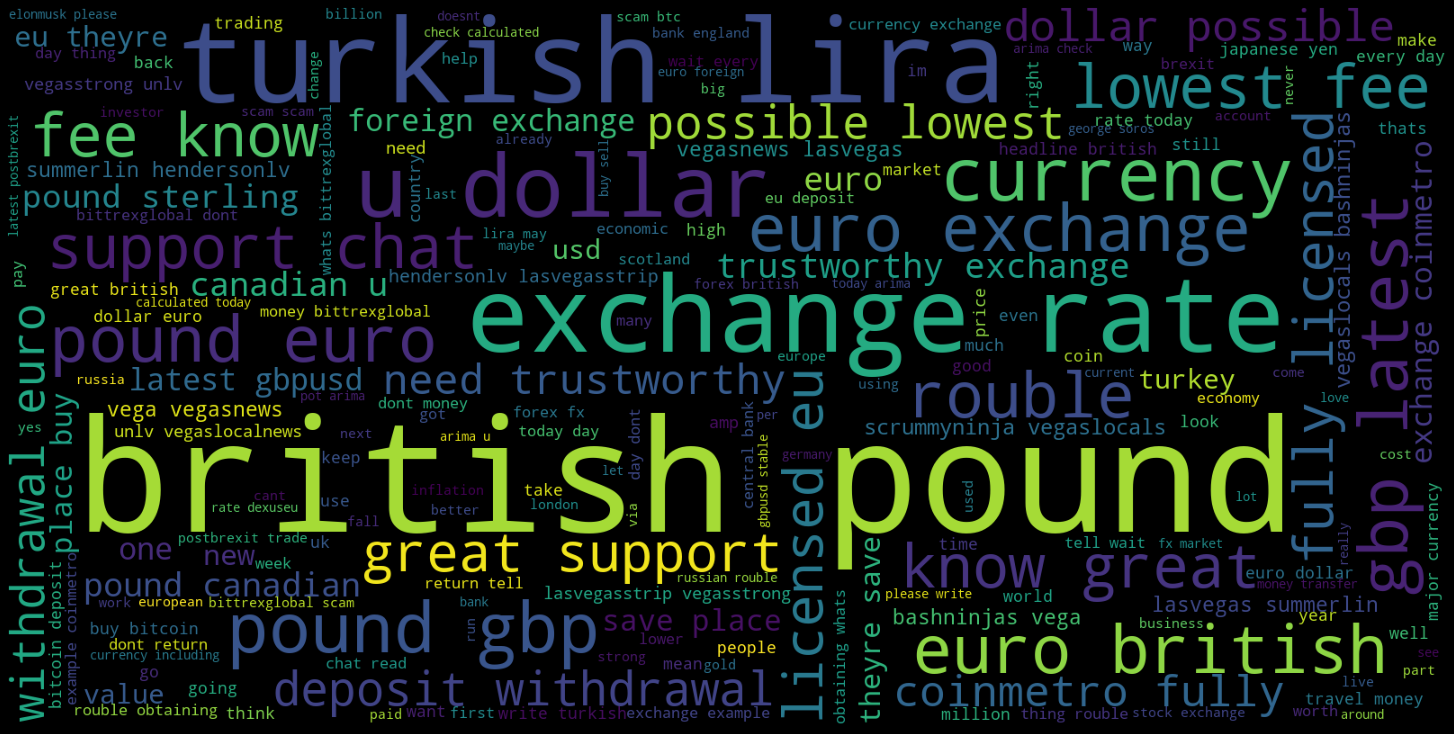

In [12]:
common_words = ''
for i in data_v1.Text:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = WordCloud(width=1600, height=800).generate(common_words)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [195]:
lb = LabelEncoder()
data_v1['Sentiment'] = lb.fit_transform(data_v1['Sentiment'])

In [196]:
tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(data_v1['Text'].values)
X = tokenizer.texts_to_sequences(df['Text'].values)
X = pad_sequences(X)

In [198]:
y = pd.get_dummies(data_v1['Sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

<h3>Defining Classifiers</h3>

In [49]:
models = [ 'SimpleRNN', 'LSTM', 'GRU']

In [51]:
def build_model(nb_words, _model="SimpleRNN", embedding_matrix=None):
    model = Sequential()
    model.add(Embedding(500, 120, input_length = nb_words))
    if _model == "SimpleRNN":
        model.add(SimpleRNN(200))
    elif _model == "LSTM":
        model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
    elif _model == "GRU":
        model.add(GRU(200))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'mse', 'mae', 'mape'])
    return model

In [412]:
scaler = MinMaxScaler()
#dataset = np.array(df['target'])
#dataset = dataset.reshape(-1,1)
X = scaler.fit_transform(X)

In [413]:
X

array([[0.        , 0.        , 0.        , ..., 0.09418838, 0.61322645,
        0.36345382],
       [0.        , 0.        , 0.        , ..., 0.02204409, 0.31462926,
        0.09638554],
       [0.        , 0.        , 0.        , ..., 0.        , 0.02204409,
        0.10843373],
       ...,
       [0.        , 0.        , 0.        , ..., 0.39078156, 0.498998  ,
        0.14457831],
       [0.        , 0.        , 0.        , ..., 0.31462926, 0.09819639,
        0.11646586],
       [0.        , 0.        , 0.        , ..., 0.65130261, 0.00601202,
        0.19277108]])

In [50]:
for model_ in models:
    print("Model : ", model_)
    model_ = build_model(X.shape[1], model_, None)
    print("Model Summary")
    print(model_.summary())
    model_.fit(X_train, y_train, epochs=5, batch_size=batch_size, verbose = 'auto')
    #predictions = model_.predict(X_test)
    #print(classification_report(y_test, predictions))
   
    y_pred = model_.predict(X_test)

    '''y_test = scaler.inverse_transform(y_test)
    y_pred = scaler.inverse_transform(y_pred)
    print(mean_squared_error(y_test,y_pred))
    print(classification_report(y_test, y_pred))'''

    model_.evaluate(X_test, y_test)
    print("")
    print("")
    print("")

Model :  SimpleRNN


NameError: name 'build_model' is not defined

In [281]:
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()
def stemmed_words(doc):
    stemmed_words = [stemmer.stem(w) for w in analyzer(doc)]
    non_stop_words = [word for word in stemmed_words]
    return non_stop_words

In [379]:
count_vectorizer =  CountVectorizer(stop_words= stop_words, max_features= 1000)
feature_vector =  count_vectorizer.fit(data_v2['Text'])
train_ds_features =  count_vectorizer.transform(data_v2['Text'])
features = feature_vector.get_feature_names()
features_counts = np.sum(train_ds_features.toarray(), axis = 0)
features_counts = pd.DataFrame(dict(features =  features, counts = features_counts))
features_counts.sort_values("counts", ascending= False)[0:15]
features_counts

features  counts
0           00      14
1          000      48
2           01      32
3           07      15
4           10      54
..         ...     ...
995  yesterday      16
996        yet      17
997     yields      16
998       yuan      40
999    zealand      12

[1000 rows x 2 columns]

In [380]:
train_x, test_x, train_y, test_y =  train_test_split(train_ds_features, data_v2['Sentiment'], test_size = 0.3, random_state = 42)

In [381]:
classifiers = {
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
    "MultinomialNB": MultinomialNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "AdaBoostClassifier": AdaBoostClassifier(),
}

In [424]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

for name, sklearn_classifier in classifiers.items():
    print("Classifier : ", name)
    sklearn_classifier.fit(train_x.toarray(), train_y)
    test_ds_predicted = sklearn_classifier.predict(test_x.toarray())
    print(metrics.classification_report(test_y,test_ds_predicted))
    print("------------------------------------------------------")
    '''print('MAE: %f' % mean_absolute_error(test_y, test_ds_predicted))
    print('MSE: %f' % mean_squared_error(test_y, test_ds_predicted))
    print('RMSE: %f' % sqrt(mean_squared_error(test_y, test_ds_predicted)))
    print('MAPE: %f' % MAPE(test_y, test_ds_predicted))'''
    print("")
    print("")

Classifier :  BernoulliNB
              precision    recall  f1-score   support

    Negative       0.68      0.27      0.39       389
    Positive       0.69      0.92      0.79       672

    accuracy                           0.69      1061
   macro avg       0.68      0.60      0.59      1061
weighted avg       0.68      0.69      0.64      1061

------------------------------------------------------


Classifier :  ComplementNB
              precision    recall  f1-score   support

    Negative       0.54      0.37      0.43       389
    Positive       0.69      0.82      0.75       672

    accuracy                           0.65      1061
   macro avg       0.61      0.59      0.59      1061
weighted avg       0.63      0.65      0.63      1061

------------------------------------------------------


Classifier :  MultinomialNB
              precision    recall  f1-score   support

    Negative       0.60      0.32      0.41       389
    Positive       0.69      0.88      0.7

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    Negative       0.54      0.49      0.51       389
    Positive       0.72      0.76      0.74       672

    accuracy                           0.66      1061
   macro avg       0.63      0.62      0.63      1061
weighted avg       0.65      0.66      0.66      1061

------------------------------------------------------


Classifier :  AdaBoostClassifier
              precision    recall  f1-score   support

    Negative       0.64      0.29      0.40       389
    Positive       0.69      0.90      0.78       672

    accuracy                           0.68      1061
   macro avg       0.66      0.60      0.59      1061
weighted avg       0.67      0.68      0.64      1061

------------------------------------------------------




In [421]:
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100